In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [4]:
test.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [5]:
train.corr()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
deg_C,1.000000,-0.668002,0.445162,0.017513,0.133167,-0.145437,0.308202,-0.050567,-0.007503,0.109757,-0.205984
relative_humidity,-0.668002,1.000000,0.249013,0.093130,-0.035152,-0.102146,0.027002,0.126466,0.016589,-0.022895,0.178608
absolute_humidity,0.445162,0.249013,1.000000,0.105977,0.236894,-0.485445,0.567376,0.124945,-0.013756,0.186293,-0.101911
sensor_1,0.017513,0.093130,0.105977,1.000000,0.811898,-0.592233,0.643191,0.860849,0.857215,0.842534,0.643044
sensor_2,0.133167,-0.035152,0.236894,0.811898,1.000000,-0.819334,0.812454,0.863464,0.821025,0.964440,0.604795
sensor_3,-0.145437,-0.102146,-0.485445,-0.592233,-0.819334,1.000000,-0.741439,-0.706006,-0.547567,-0.735545,-0.427622
sensor_4,0.308202,0.027002,0.567376,0.643191,0.812454,-0.741439,1.000000,0.641120,0.571412,0.783750,0.235662
sensor_5,-0.050567,0.126466,0.124945,0.860849,0.863464,-0.706006,0.641120,1.000000,0.834501,0.877662,0.708270
target_carbon_monoxide,-0.007503,0.016589,-0.013756,0.857215,0.821025,-0.547567,0.571412,0.834501,1.000000,0.881884,0.806099
target_benzene,0.109757,-0.022895,0.186293,0.842534,0.964440,-0.735545,0.783750,0.877662,0.881884,1.000000,0.664235


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [7]:
train["hour"] = pd.to_datetime(train["date_time"]).dt.hour
train["month"] = pd.to_datetime(train["date_time"]).dt.month
test["hour"] = pd.to_datetime(test["date_time"]).dt.hour
test["month"] = pd.to_datetime(test["date_time"]).dt.month


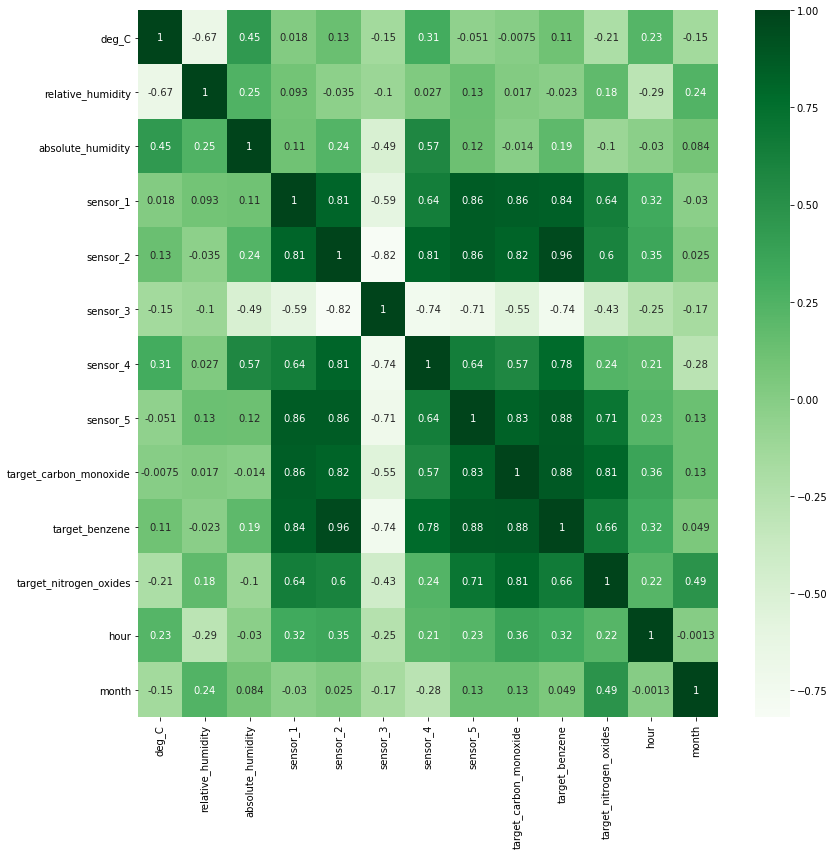

In [23]:
fig, ax = plt.subplots(figsize = (13,13))
sns.heatmap(train.corr(), cmap = 'Greens', annot = True, ax = ax);

In [39]:
from sklearn.preprocessing import StandardScaler
std_scr = StandardScaler()
features = ['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'hour', 'month']
X = std_scr.fit_transform(train[features])
X_test = std_scr.fit_transform(test[features])
y1 = train['target_carbon_monoxide']
y2 = train['target_benzene']
y3 = train['target_nitrogen_oxides']

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [46]:
sgd_reg = SGDRegressor()
cv = cross_val_score(sgd_reg,X,y3,cv=5)
print(cv.mean())

0.38240722535948607


In [47]:
rfr = GradientBoostingRegressor()
cv = cross_val_score(rfr,X,y1,cv=5)
print(cv.mean())

0.8767941554425269


In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
parameters = [{
    "learning_rate": [0.05, 0.1, 0.15],
    "min_samples_split": [70, 75, 80, 85],
    "min_samples_leaf": [65, 70, 75, 80, 85],
    "max_depth":[ 8, 10 ,12]}]
model1 = RandomizedSearchCV( n_iter     = 50,
                                        estimator           = GradientBoostingRegressor(),
                                        param_distributions = parameters,
                                        n_jobs              = 4,
                                        refit               = True,
                                        cv                  = 5,
                                        verbose             = 1,
                                        pre_dispatch        = '2*n_jobs',
                                        scoring             = 'neg_mean_squared_log_error'
                                        )         # scoring = 'accuracy'
model1.fit( X, y1)
print( model1.best_estimator_ )
print( model1.best_score_ )
print( model1.best_params_ )

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\38097\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan -0.02058464 -0.02069887 -0.02062091 -0.02093235 -0.0212166
 -0.02082233 -0.02086078 -0.02114807 -0.02081956         nan -0.02093041
 -0.02086078 -0.0206665          nan -0.02114694         nan -0.0212737
 -0.02093041 -0.0211539  -0.02072908         nan         nan         nan
 -0.02082933         nan -0.02063525 -0.0212737          nan -0.02119355
 -0.02110378 -0.02069887 -0.02082233 -0.02087957 -0.02080939 -0.02082933
         nan -0.02082933 -0.02099351 -0.02050648 -0.02072908 -0.02050648
         nan         nan         nan -0.02087957 -0.0206665          nan
 -0.020784   -0.02080939]
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.05, max_depth=12, min_samples_leaf=65,
                          min_samples_split=80)
-0.020506481822692123
{'min_samples_split': 80, 'min_samples_leaf': 65, 'max_depth': 12, 'learning_rate': 0.05}


In [55]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    "learning_rate": [0.05, 0.1, 0.15],
    "min_samples_split": [30, 40 ,50, 60],
    "min_samples_leaf": [30, 40,50, 60],
    "max_depth":[3, 5, 7]}

model2 = RandomizedSearchCV( n_iter     = 50,
                                        estimator           = GradientBoostingRegressor(),
                                        param_distributions = parameters,
                                        n_jobs              = 4,
                                        refit               = True,
                                        cv                  = 5,
                                        verbose             = 1,
                                        pre_dispatch        = '2*n_jobs',
                                        scoring             = 'neg_mean_squared_log_error'
                                        )         # scoring = 'accuracy'
model2.fit( X, y2)
print( model2.best_estimator_ )
print( model2.best_score_ )
print( model2.best_params_ )

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\38097\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.00934346 -0.00902586 -0.01154506         nan -0.00990931 -0.00960489
 -0.00928769         nan -0.00902921 -0.01144341 -0.01001164 -0.00991571
 -0.00960011         nan -0.00939389 -0.0093092  -0.00911734 -0.00924802
 -0.00961074 -0.00893291 -0.00903127 -0.00902173 -0.00901781 -0.009733
         nan -0.00903612 -0.00912191 -0.00962186 -0.0099225  -0.0099225
         nan -0.01001582 -0.01141635 -0.00975012 -0.00908599         nan
 -0.01146739 -0.00924474 -0.00887799 -0.01144757         nan -0.00960148
 -0.00974881 -0.00938463         nan -0.00923302 -0.00958373 -0.00901897
 -0.00975012 -0.00975776]
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.15, max_depth=7, min_samples_leaf=40,
                          min_samples_split=60)
-0.008877990227996787
{'min_samples_split': 60, 'min_samples_leaf': 40, 'max_depth': 7, 'learning_rate': 0.15}


In [56]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    "learning_rate": [0.1, 0.15, 0.2],
    "min_samples_split": [30, 40 ,50, 60],
    "min_samples_leaf": [15, 20, 30, 40 ],
    "max_depth":[4, 5, 6]}

model3 = RandomizedSearchCV( n_iter     = 50,
                                        estimator           = GradientBoostingRegressor(),
                                        param_distributions = parameters,
                                        n_jobs              = 4,
                                        refit               = True,
                                        cv                  = 5,
                                        verbose             = 1,
                                        pre_dispatch        = '2*n_jobs',
                                        scoring             = 'neg_mean_squared_log_error'
                                        )         # scoring = 'accuracy'
model3.fit( X, y3)
print( model3.best_estimator_ )
print( model3.best_score_ )
print( model3.best_params_ )

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\38097\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.2, max_depth=6, min_samples_leaf=15,
                          min_samples_split=30)
nan
{'min_samples_split': 30, 'min_samples_leaf': 15, 'max_depth': 6, 'learning_rate': 0.2}


In [57]:
target1 = model1.predict(X_test)
target2 = model2.predict(X_test)
target3 = model3.predict(X_test)
output = pd.DataFrame({
    'date_time': test['date_time'], 
    'target_carbon_monoxide': target1,
    'target_benzene' : target2,
    'target_nitrogen_oxides' : target3})
output.to_csv('air_pollution_submission.csv', index=False)
output

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.571349,6.966930,93.187478
1,2011-01-01 01:00:00,2.108988,9.611171,180.401737
2,2011-01-01 02:00:00,1.813401,10.079331,120.755691
3,2011-01-01 03:00:00,2.051800,10.849004,158.645344
4,2011-01-01 04:00:00,1.470082,8.104235,101.465359
...,...,...,...,...
2242,2011-04-04 10:00:00,3.025136,16.947047,450.663293
2243,2011-04-04 11:00:00,2.813180,13.747828,392.650800
2244,2011-04-04 12:00:00,2.393479,14.499239,456.054640
2245,2011-04-04 13:00:00,2.001557,12.431192,415.782238
